In [16]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [17]:
# Function to decode RLE to a mask
def rle_decode(mask_rle, shape = (768, 768)):
    s = list(map(int, mask_rle.split()))
    starts, lengths = [np.asarray(x) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [18]:
# Paths to the data
notebook_dir = os.getcwd()
base_dir = os.path.dirname(notebook_dir)
img_folder = os.path.join(base_dir, 'airbus-ship-detection', 'train_v2')
csv_path = os.path.join(base_dir, 'airbus-ship-detection', 'train_ship_segmentations_v2.csv')

In [19]:
# Load data
data = pd.read_csv(csv_path)

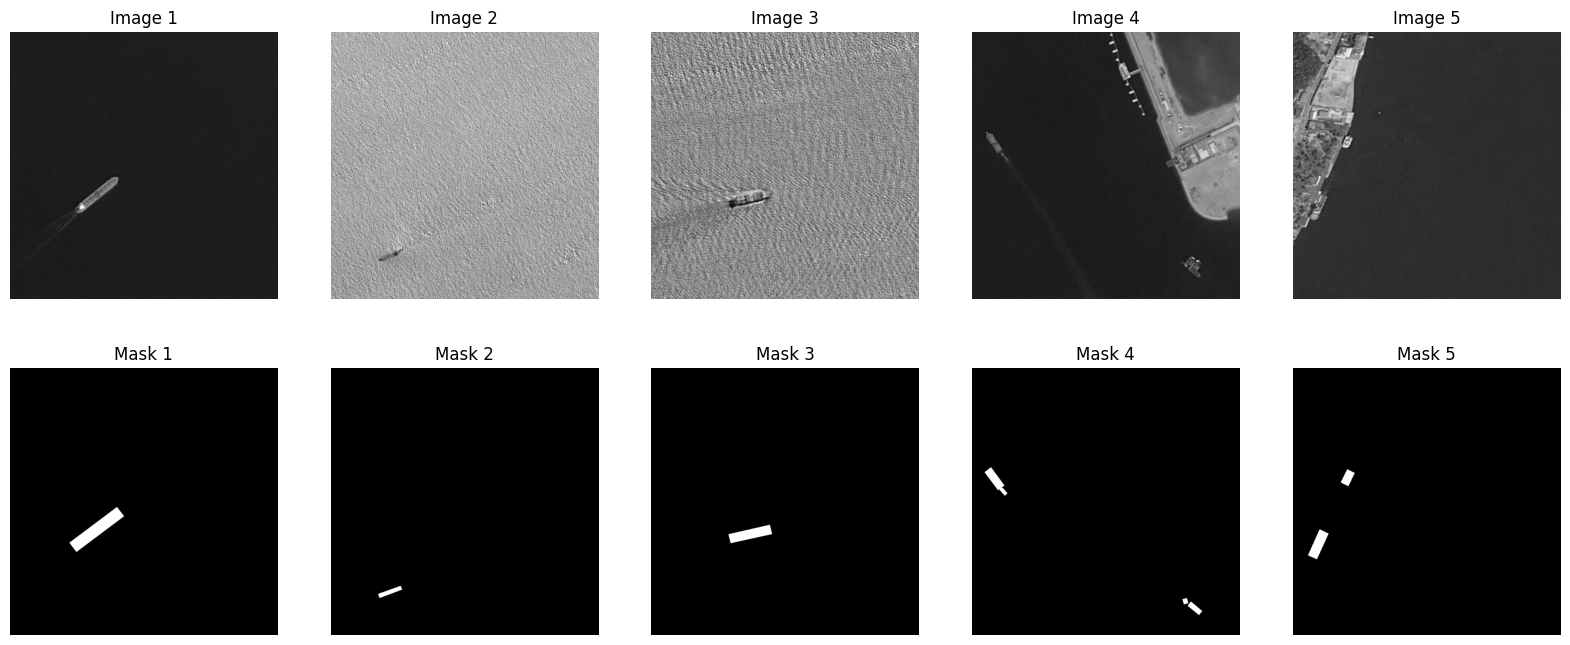

In [20]:
# Visualization of example images and masks
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for idx, img_file in enumerate(os.listdir(img_folder)[:5]):
    img_path = os.path.join(img_folder, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    mask = np.zeros((768, 768), dtype=np.uint8)
    mask_rles = data[data['ImageId'] == img_file]['EncodedPixels'].values
    for mask_rle in mask_rles:
        if isinstance(mask_rle, str):
            mask += rle_decode(mask_rle, (768, 768))
    
    mask = np.clip(mask, 0, 1)
    
    axes[0, idx].imshow(img, cmap='gray')
    axes[0, idx].set_title(f'Image {idx + 1}')
    axes[0, idx].axis('off')
    
    axes[1, idx].imshow(mask, cmap='gray')
    axes[1, idx].set_title(f'Mask {idx + 1}')
    axes[1, idx].axis('off')

plt.show()

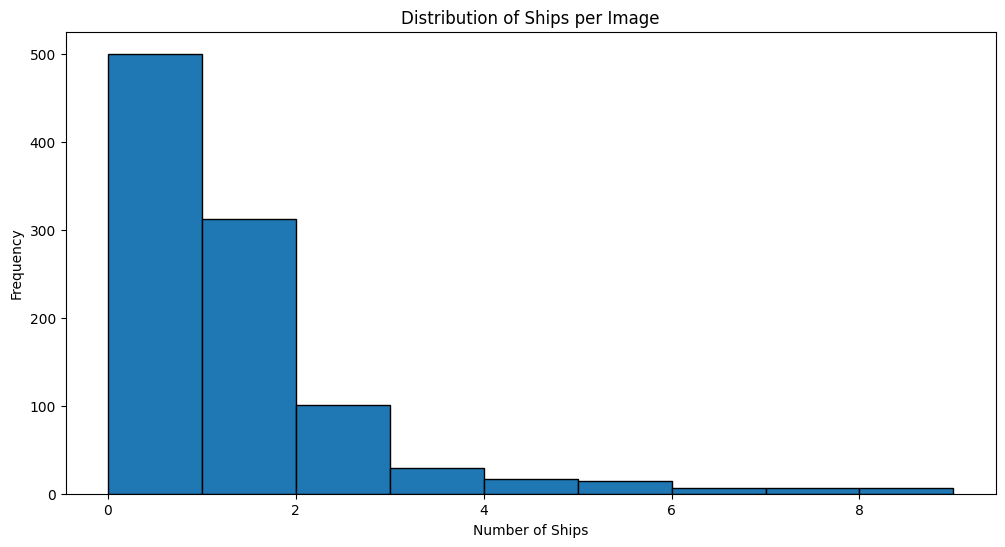

In [21]:
# Analysis of mask distribution
data['Ship'] = data['EncodedPixels'].notnull().astype(int)
ship_distribution = data.groupby('ImageId')['Ship'].sum()

plt.figure(figsize=(12, 6))
plt.hist(ship_distribution, bins=range(0, 10), edgecolor='black')
plt.title('Distribution of Ships per Image')
plt.xlabel('Number of Ships')
plt.ylabel('Frequency')
plt.show()